# Libraries

In [10]:
# ================================================
# 📦 Standard Libraries
# ================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# ================================================
# ⚙️ Preprocessing & Pipelines
# ================================================
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ================================================
# 🧪 Sampling Techniques
# ================================================
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours 

# ================================================
# 🤖 Models
# ================================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# ================================================
# 📊 Model Evaluation
# ================================================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)


In [11]:
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA 

In [12]:
CatCols = df.select_dtypes(include=['object', 'category']).columns
NumCols = df.select_dtypes(include=['number']).columns

## Explore Categorical Features

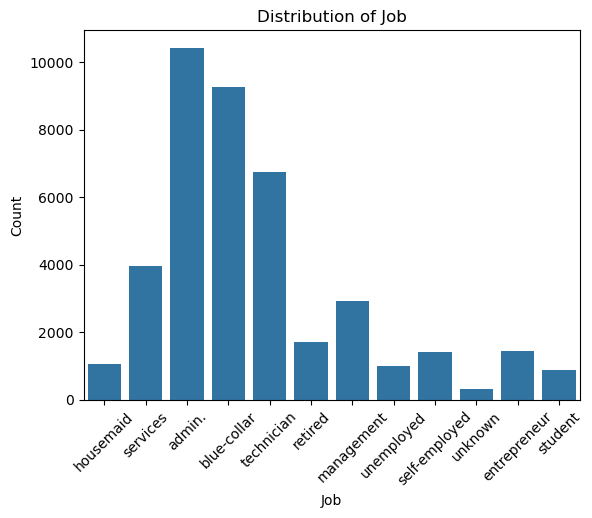

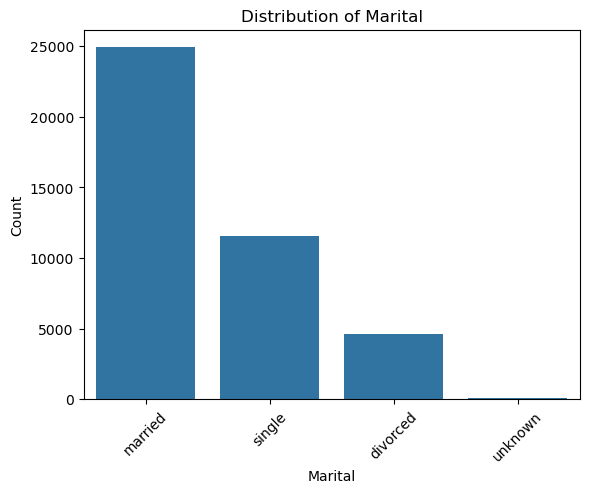

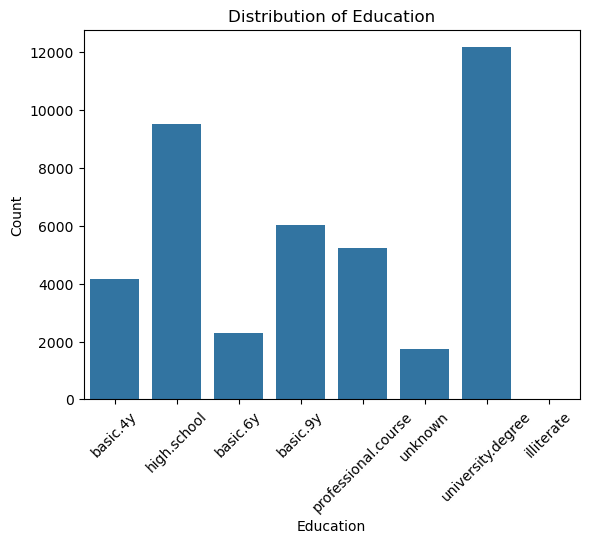

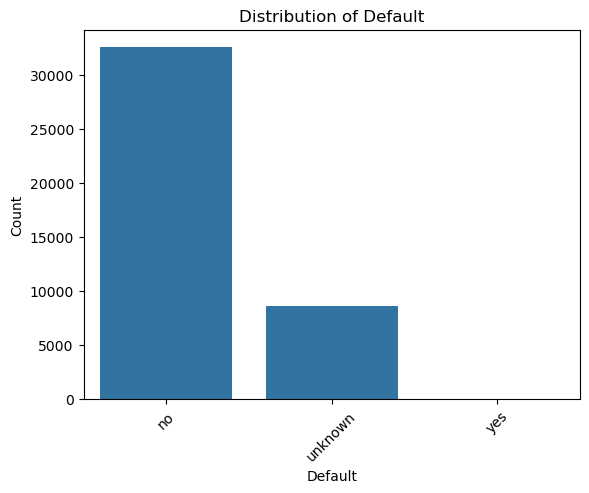

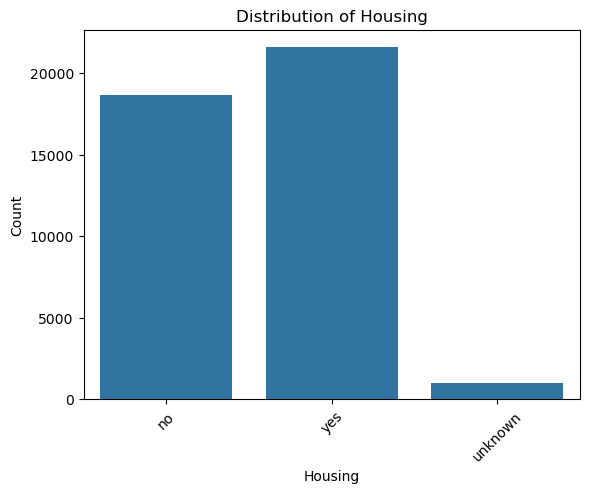

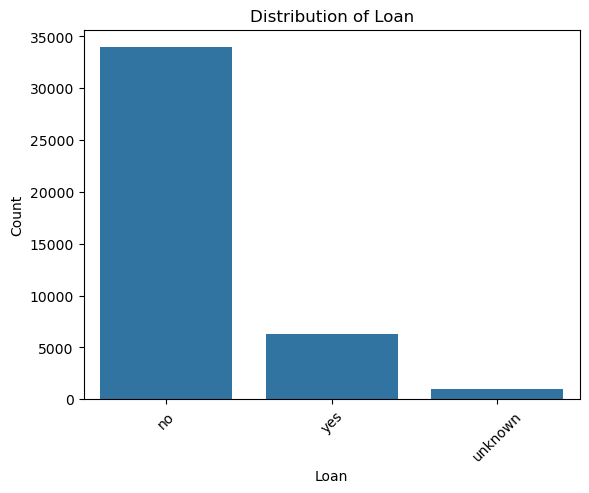

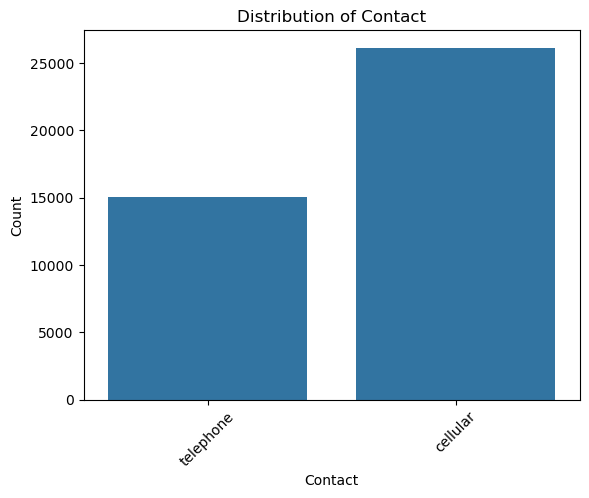

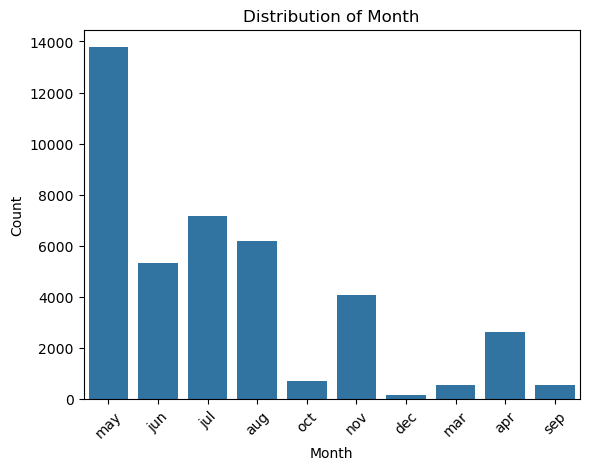

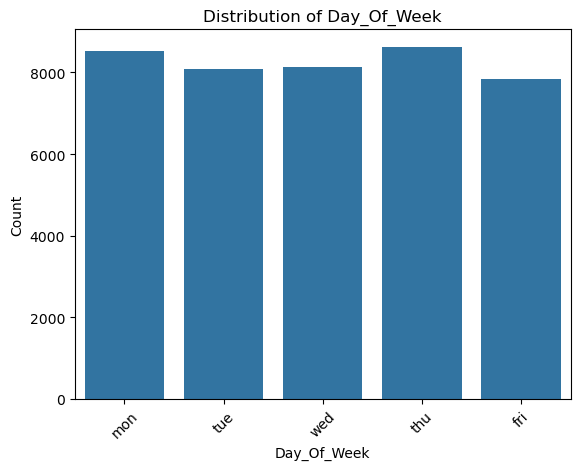

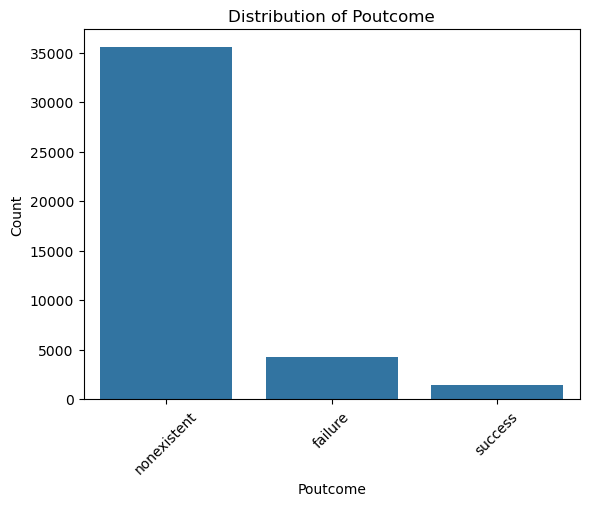

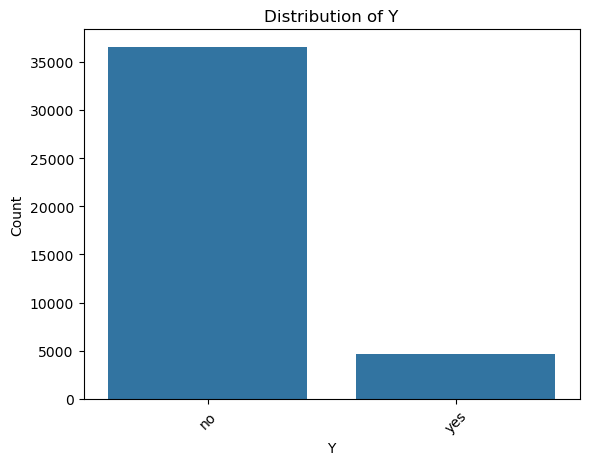

In [13]:
for col in CatCols:
    figsize=(12,6)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

## Explore Numerical Features

In [14]:
df[NumCols]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


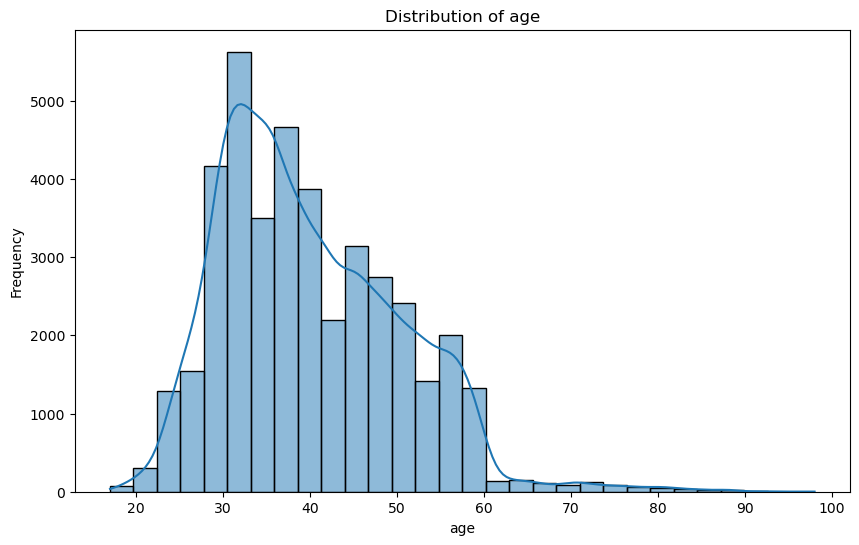

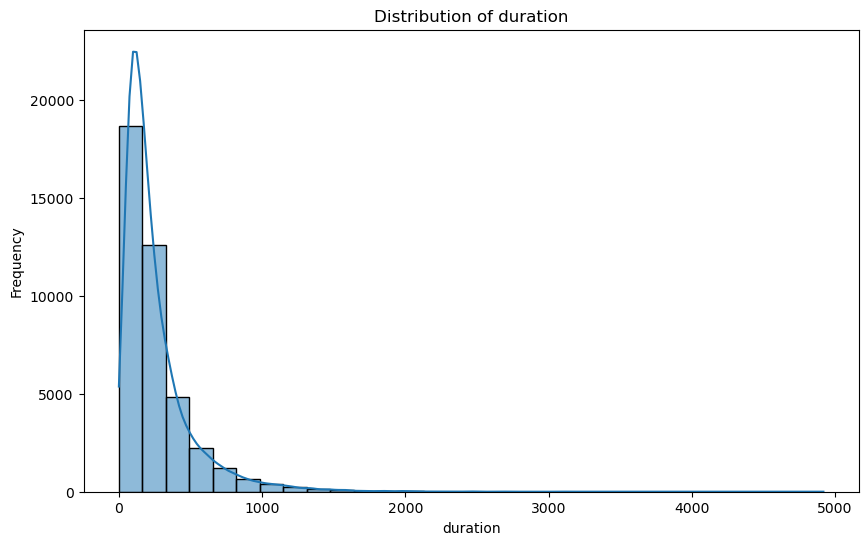

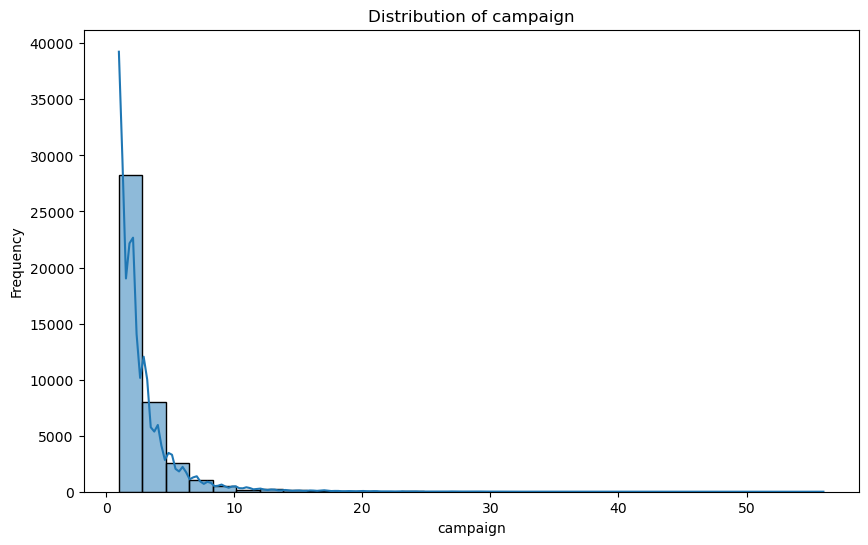

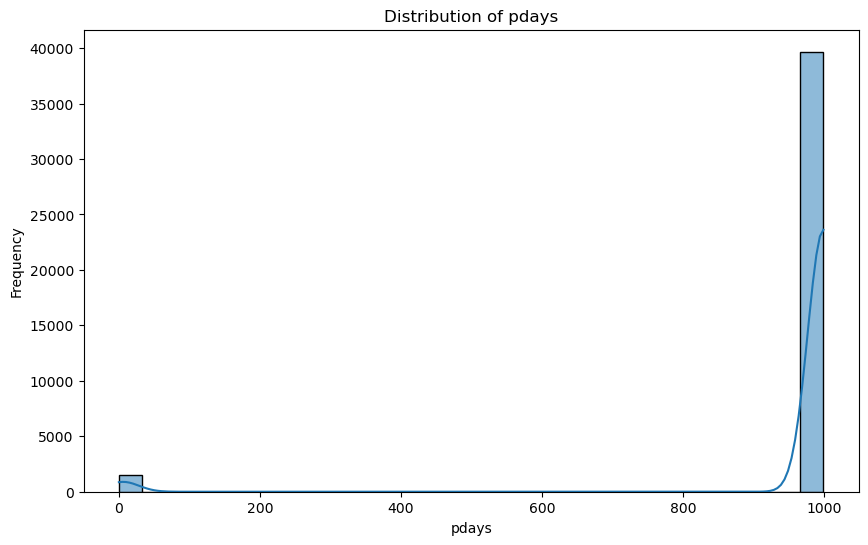

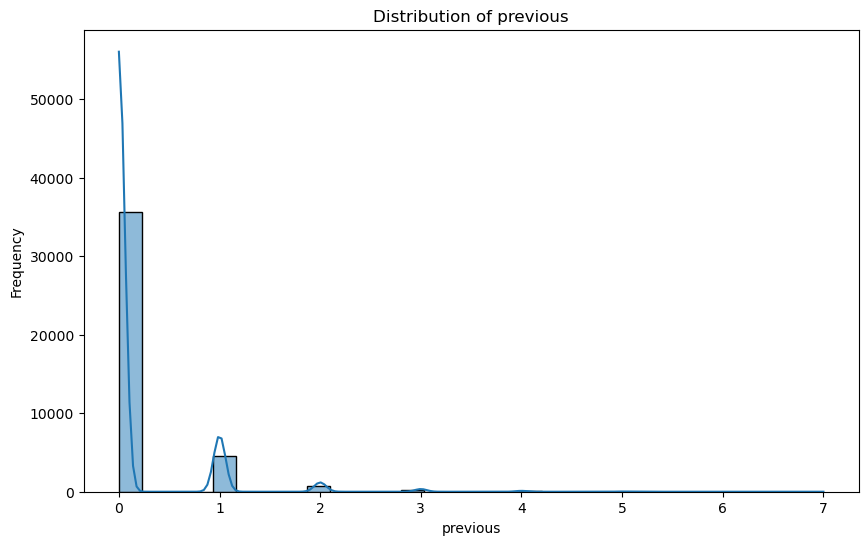

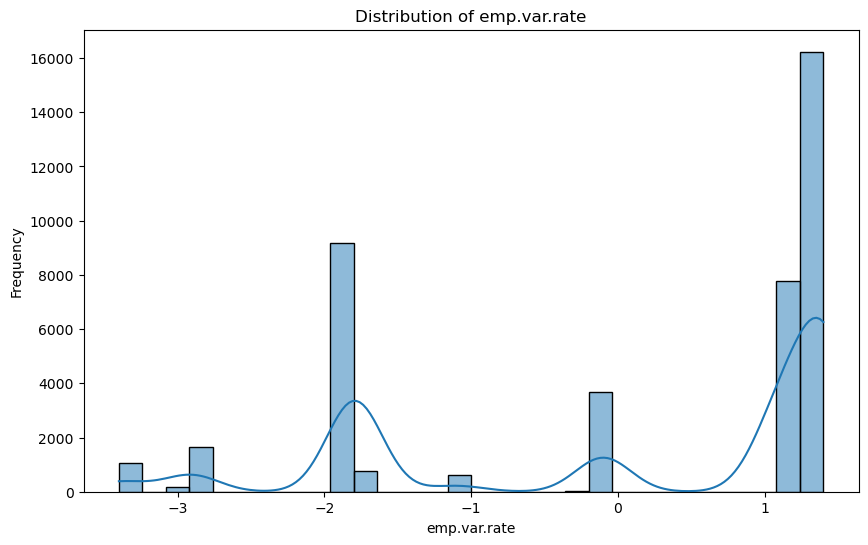

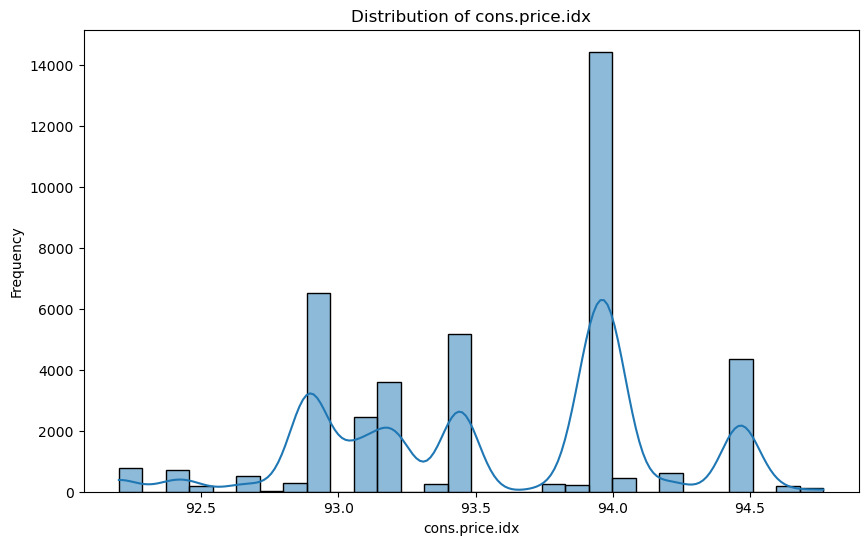

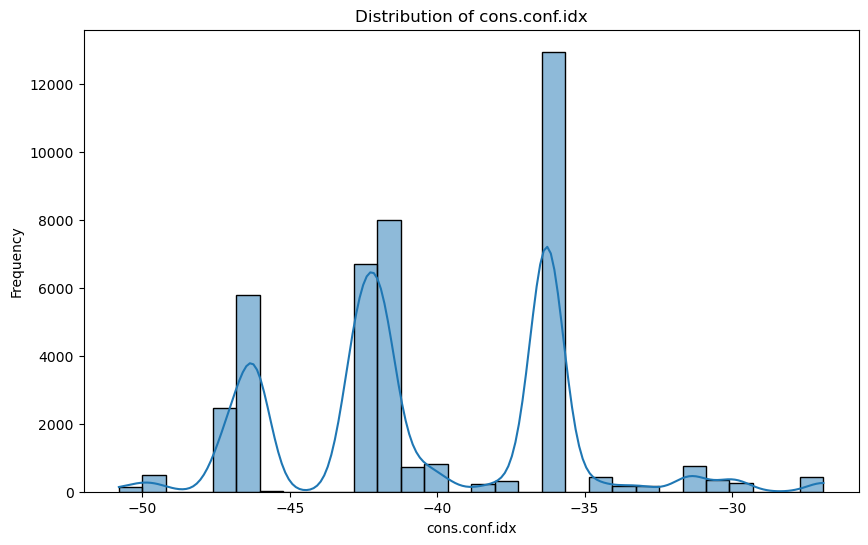

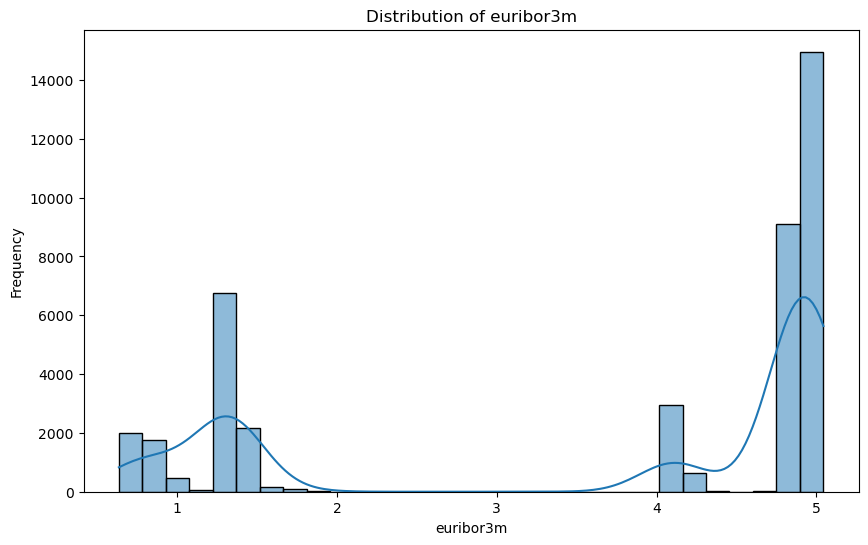

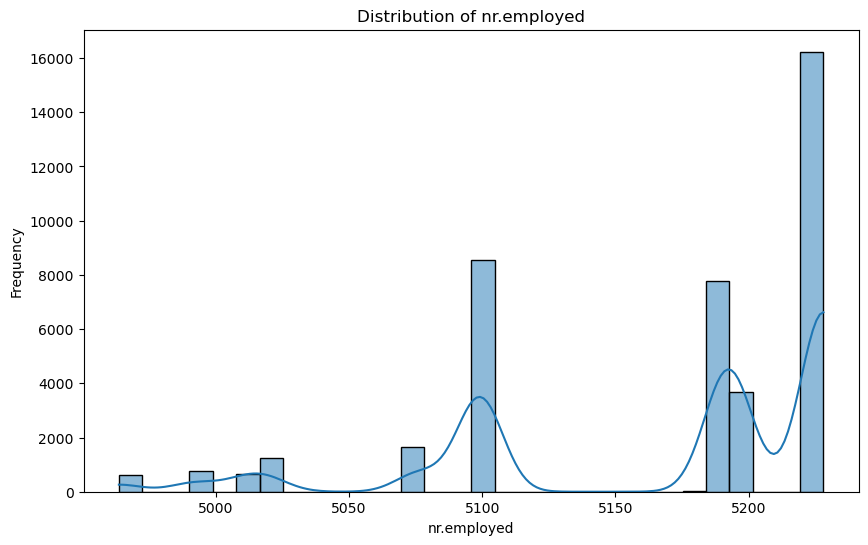

In [15]:
# Plot Distribution of Numerical Columns
for col in NumCols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Comparison with target variable

### Comparison using Numerical

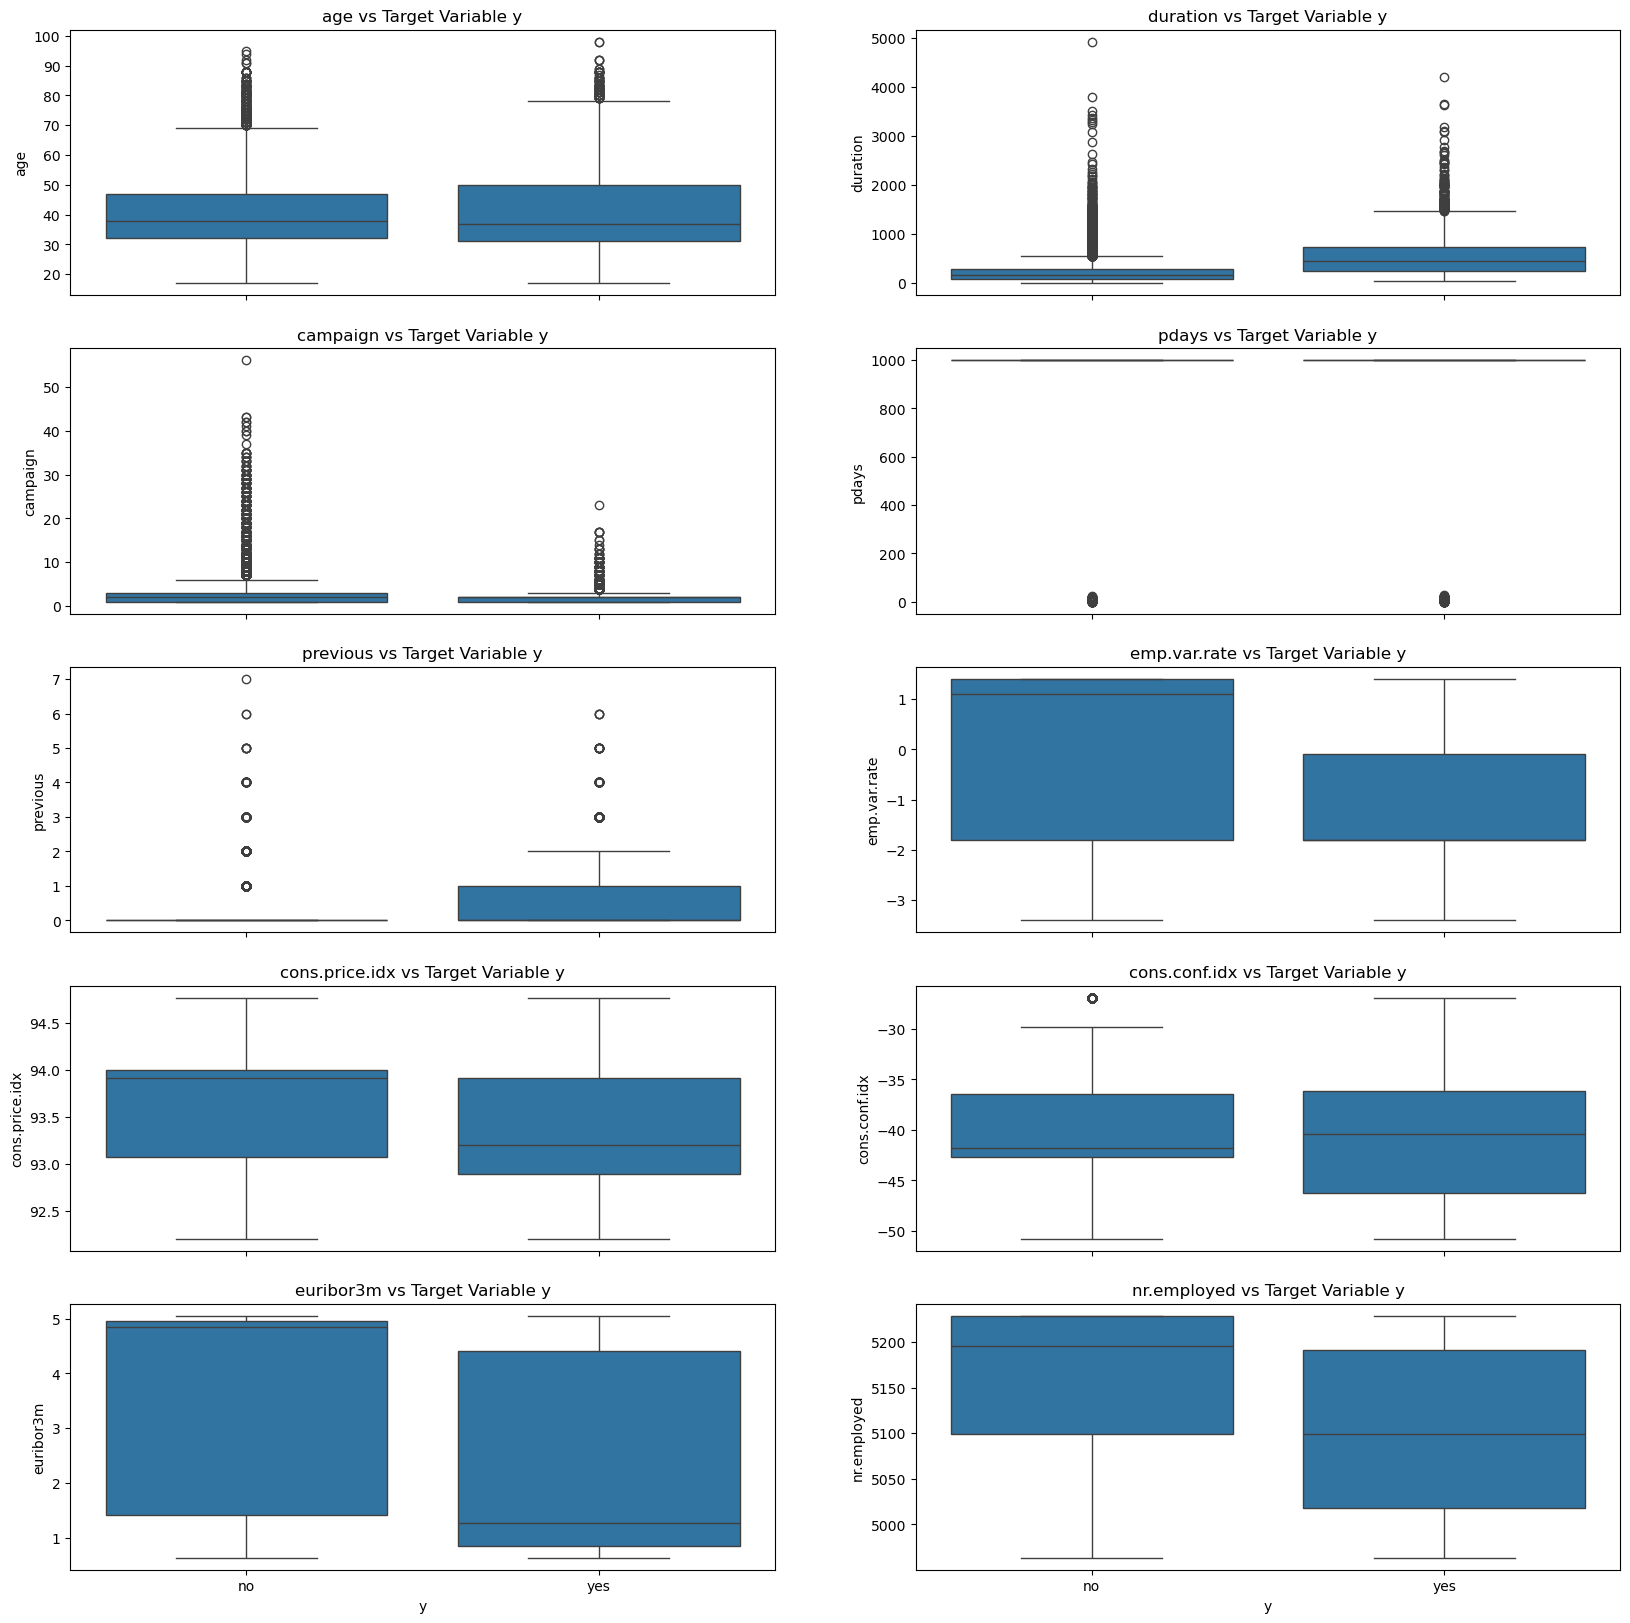

In [16]:
# Plot Numerical Columns against Target Variable y
fig, ax = plt.subplots(figsize=(20, 20), ncols=2, nrows=len(NumCols)//2, sharex=True)
for i, col in enumerate(NumCols):
    sns.boxplot(x='y', y=col, data=df, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f'{col} vs Target Variable y')
    # ax[i // 2, i % 2].set_xlabel('Target Variable y')
    ax[i // 2, i % 2].set_ylabel(col)

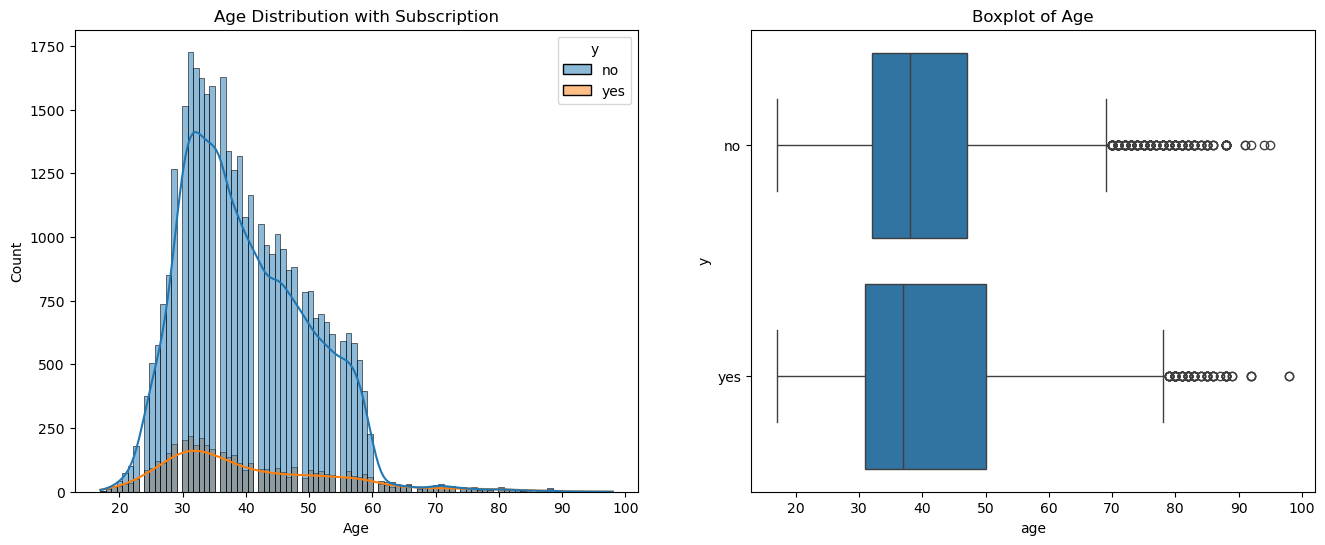

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df, x='age', hue='y', kde=True, ax= axes[0])
axes[0].set_title('Age Distribution with Subscription')
axes[0].set_xlabel('Age')

sns.boxplot(data= df, x='age', y='y', ax=axes[1])
axes[1].set_title('Boxplot of Age')

plt.show()

### Comparison using Categorical

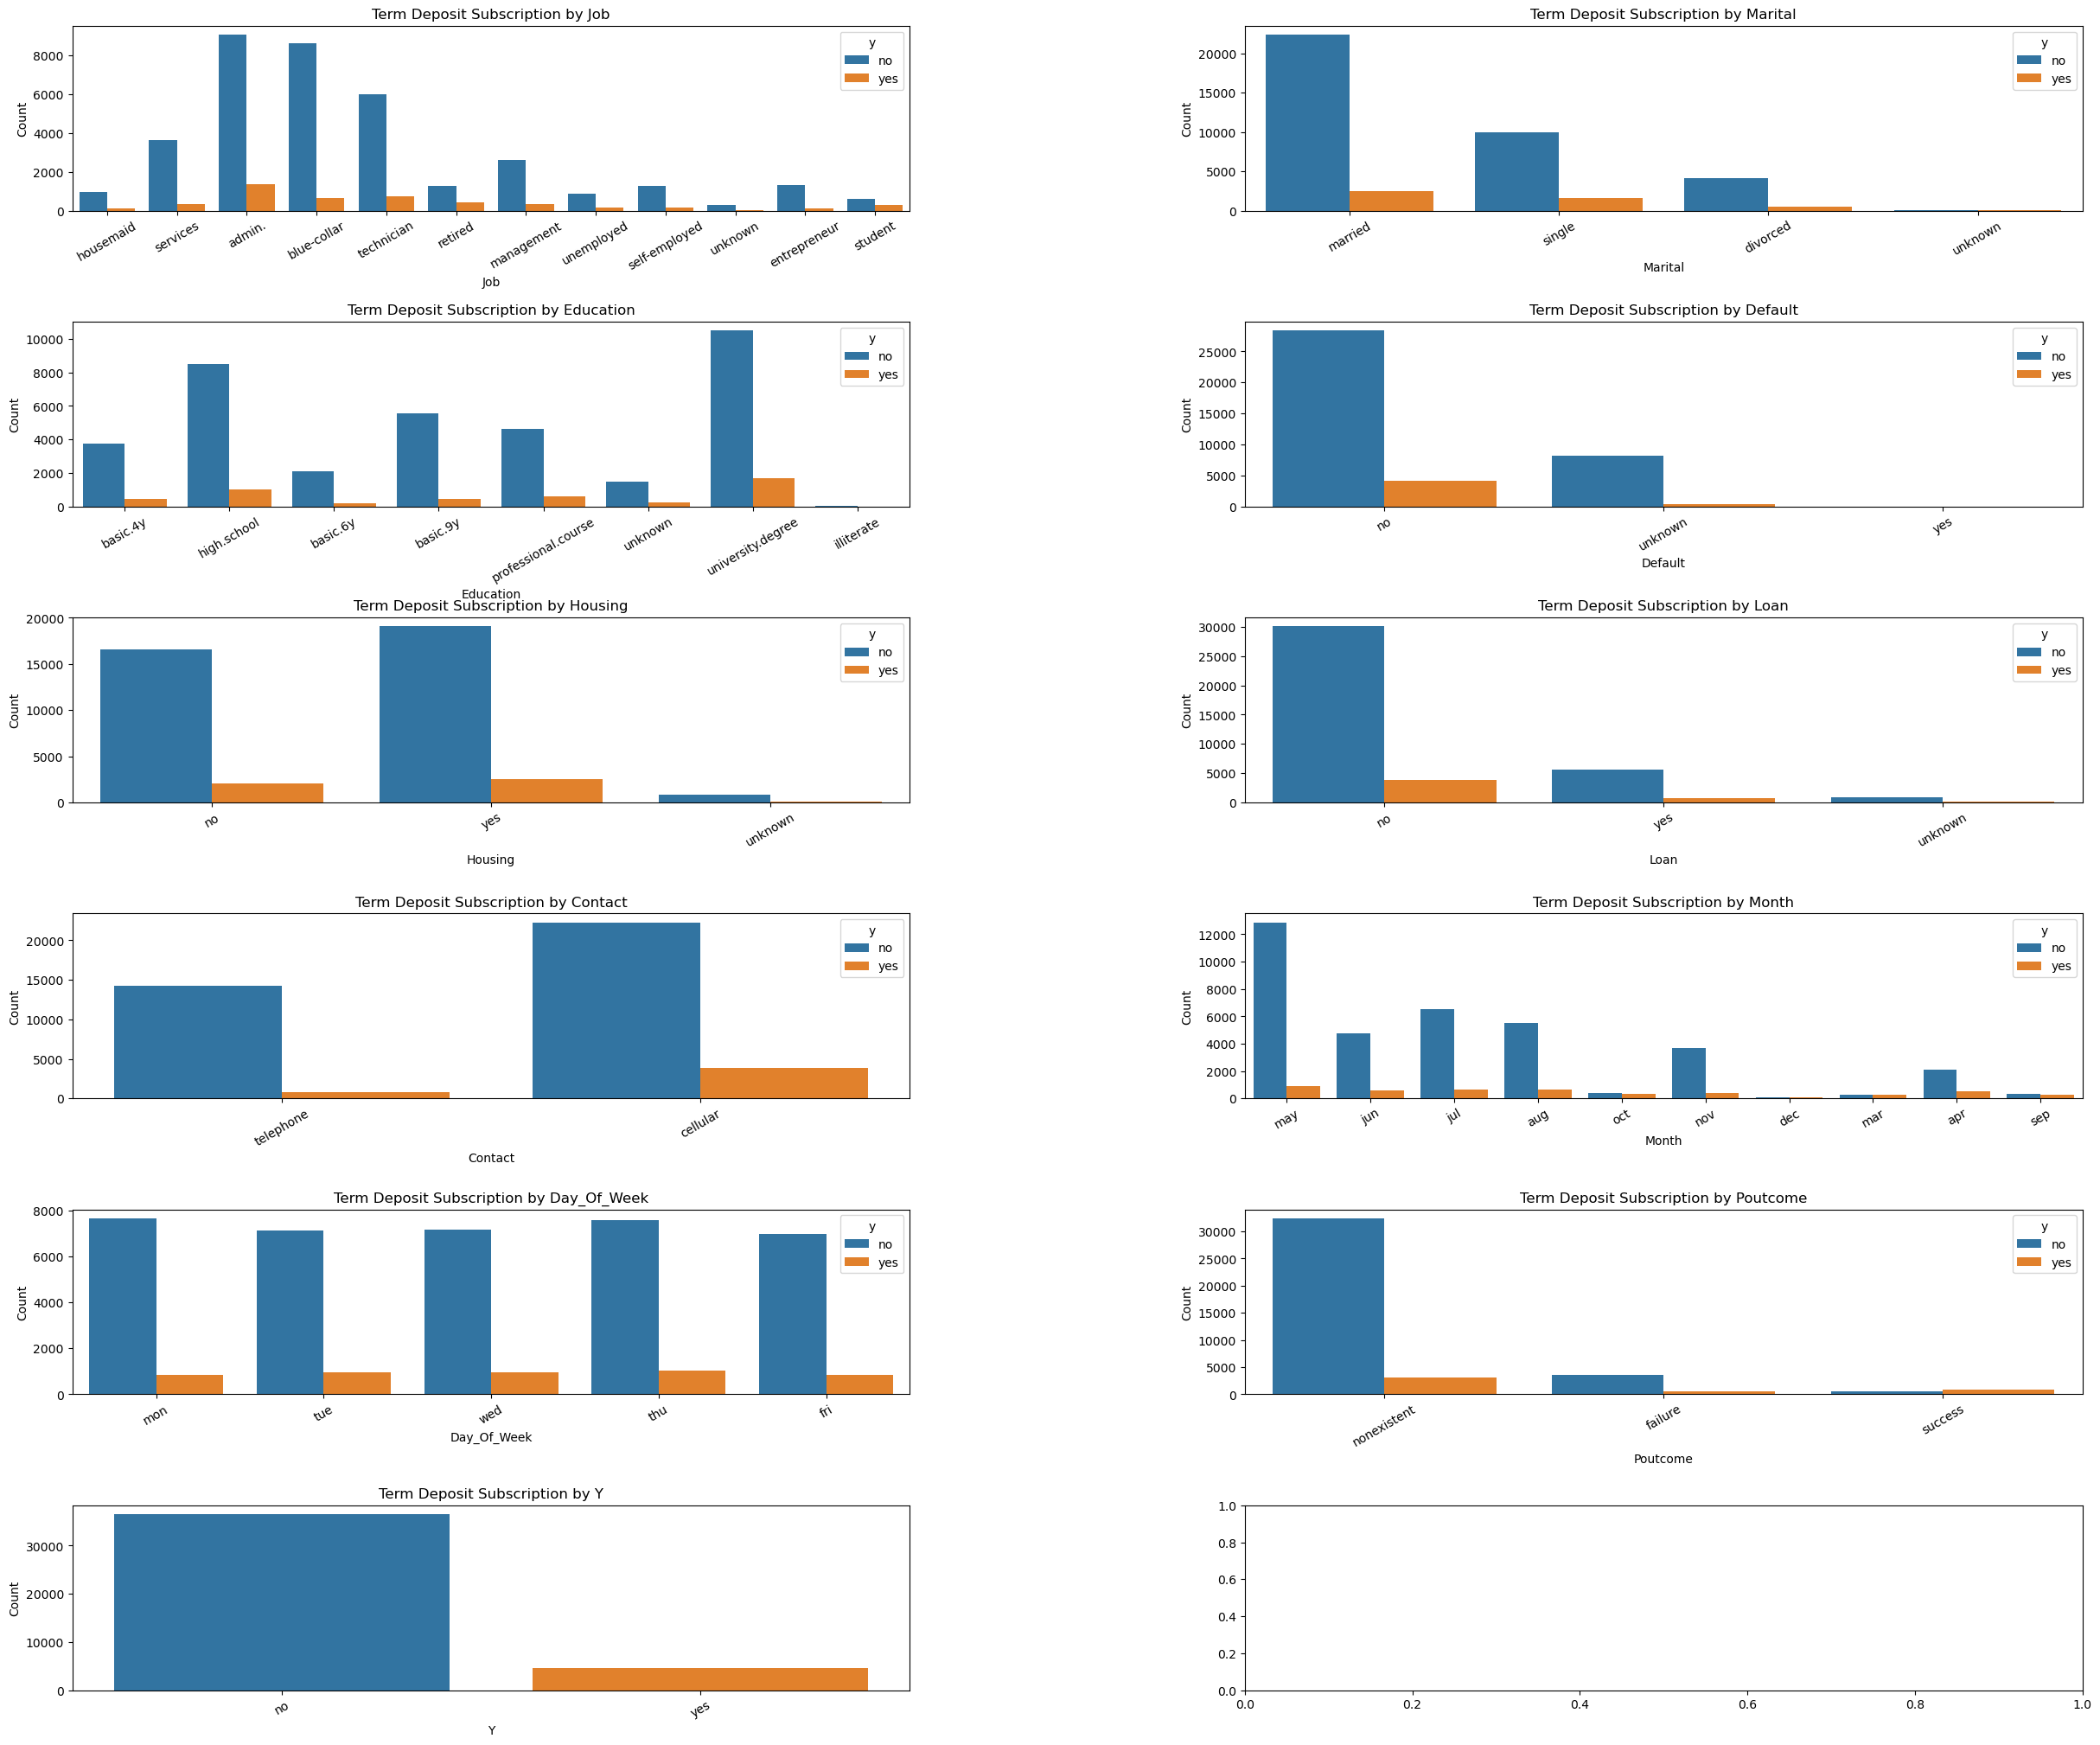

In [18]:
fig, ax= plt.subplots(figsize=(30,25), ncols=2, nrows=len(CatCols)//2+1)
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Manually adjust gaps


for i, col in enumerate(CatCols):
    sns.countplot(data=df, x=col, hue='y', ax=ax[i//2, i % 2])
    ax[i//2, i % 2].set_title(f'Term Deposit Subscription by {col.title()}')
    ax[i//2, i % 2].set_xlabel(col.title())
    ax[i//2, i % 2].set_ylabel('Count')
    ax[i//2, i % 2].tick_params(axis='x', rotation=30)

# Data Engineering

## Explore and manage missing values

In [19]:
X_clean = df.drop(columns=['y'])
y_clean = df['y'].replace({'yes': 1, 'no': 0})

In [20]:
NumCols = X_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
CatCols = X_clean.select_dtypes(include=['object']).columns.tolist()

## Train Test Split

In [21]:
# Split the training set into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, stratify=y_clean, test_size=0.2, random_state=42
)


## Data Preprocessing

In [22]:
# Identify categorical columns (indices)
categorical_features = X_clean.select_dtypes(include=['object', 'category']).columns
categorical_indices = [X_clean.columns.get_loc(col) for col in categorical_features]

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), NumCols),  # Numerical columns
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), CatCols)  # Categorical columns
], remainder='passthrough')

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [24]:
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
Index: 32950 entries, 25611 to 10747
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       32950 non-null  int64
dtypes: int64(1)
memory usage: 514.8 KB


### Sampling Method 1 - Random Undersampler

In [25]:
# Initialize RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply under-sampling on processed numeric + one-hot encoded data
X_train_rus, y_train_rus = rus.fit_resample(X_train_processed, y_train)

print("Before Random Undersampling class distribution:", np.bincount(y_train))
print("After Random Undersampling class distribution:", np.bincount(y_train_rus))

Before Random Undersampling class distribution: [29238  3712]
After Random Undersampling class distribution: [3712 3712]


### Sampling Method 1 - Tomek Links

In [26]:
# Initialize Tomek Links
tl = TomekLinks(sampling_strategy='auto')

# Apply Tomek Links on processed training data
X_train_tl, y_train_tl = tl.fit_resample(X_train_processed, y_train)

print("Before Tomek Links class distribution:", np.bincount(y_train))
print("After Tomek Links class distribution:", np.bincount(y_train_tl))


Before Tomek Links class distribution: [29238  3712]
After Tomek Links class distribution: [28397  3712]


### Sampling Method 3 - Edited Nearest Neighbours (ENN)

In [27]:
# Initialize ENN
enn = EditedNearestNeighbours()

# Apply ENN on processed training data
X_train_enn, y_train_enn = enn.fit_resample(X_train_processed, y_train)

print("Before ENN class distribution:", np.bincount(y_train))
print("After ENN class distribution:", np.bincount(y_train_enn))


Before ENN class distribution: [29238  3712]
After ENN class distribution: [25393  3712]


### Imbalance Plotting

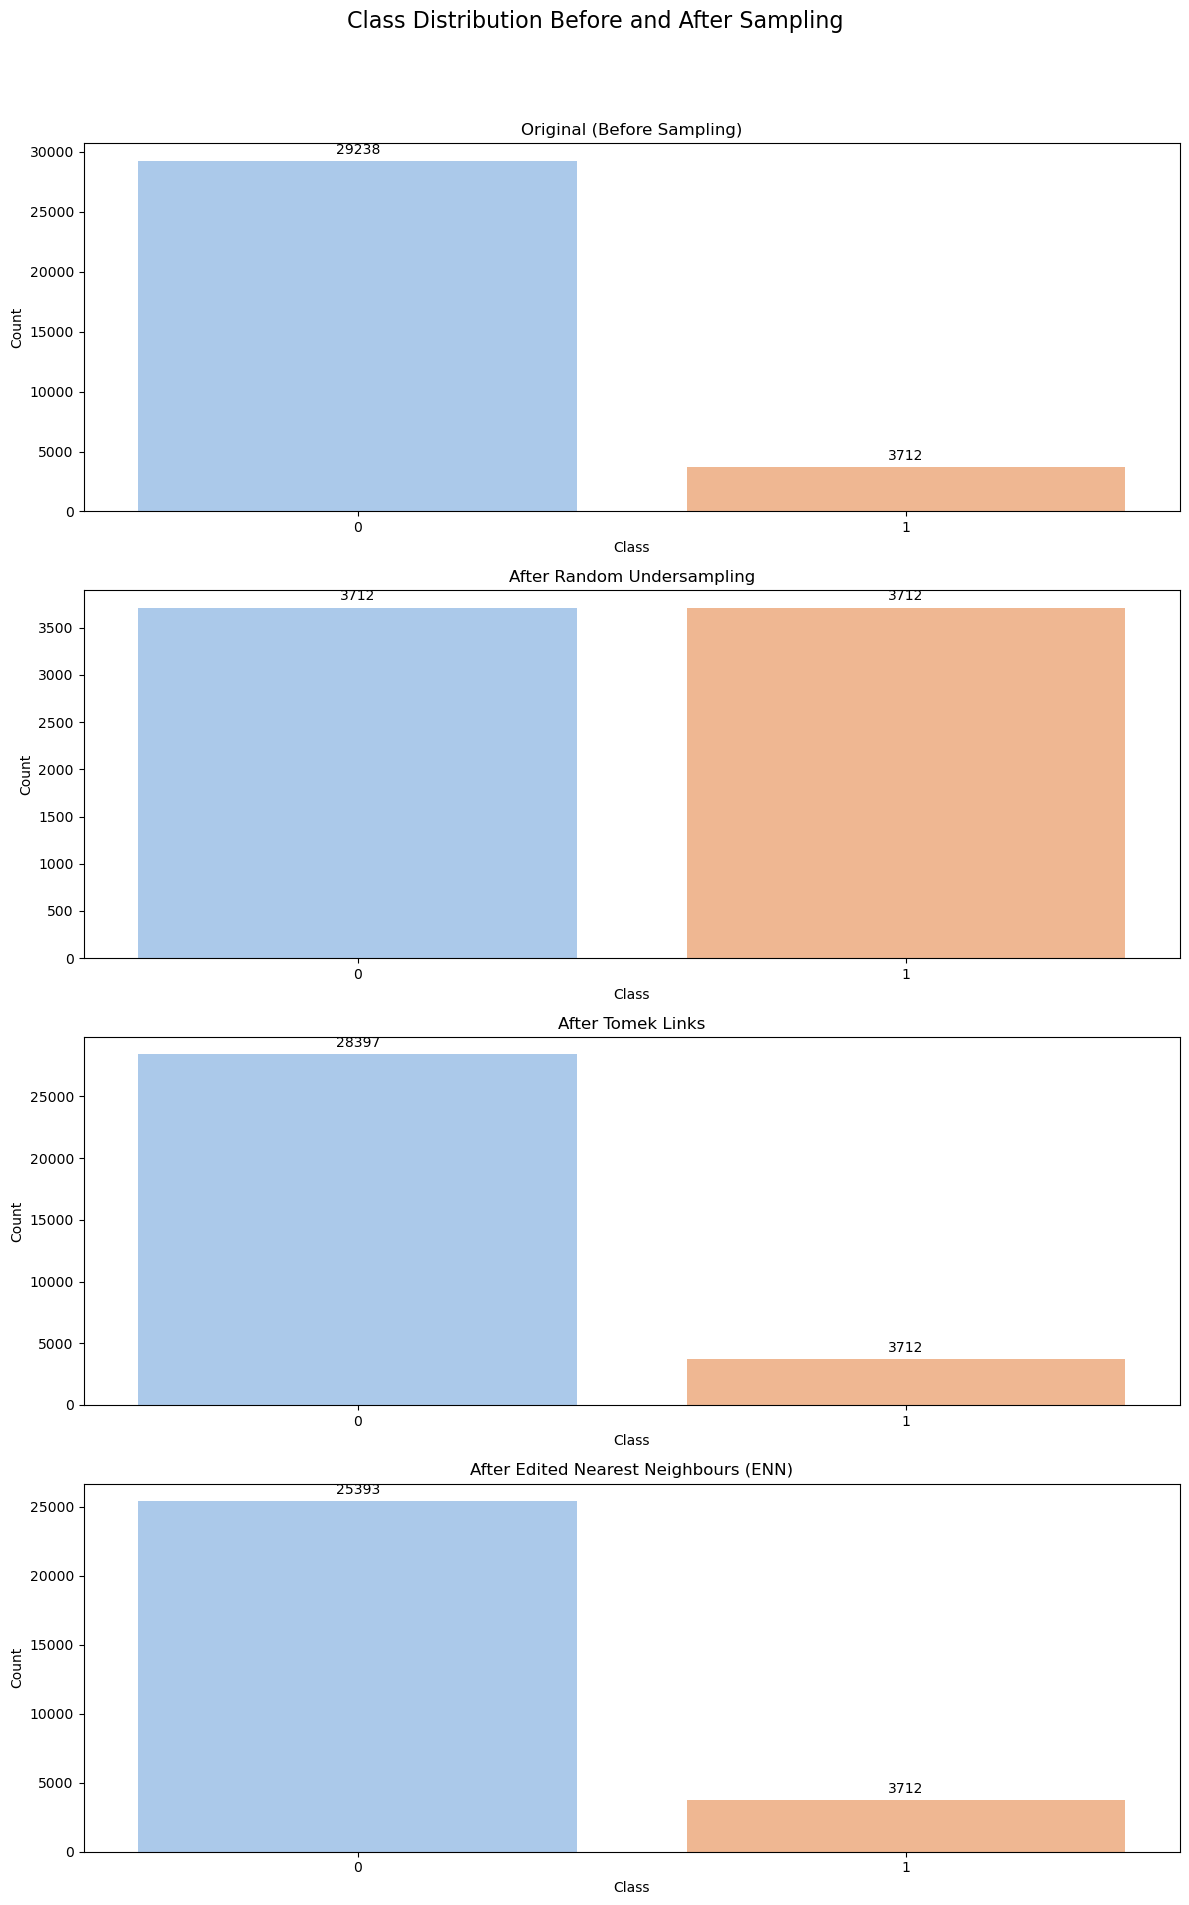

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Helper function to plot class distributions with value labels
def plot_class_distribution(y_data, title, ax):
    count_plot = sns.countplot(x=y_data, palette="pastel", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    
    # Add count labels above bars
    for container in count_plot.containers:
        count_plot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Create a figure with 4 rows and 1 column of subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 20))
fig.suptitle("Class Distribution Before and After Sampling", fontsize=16)

# Plot original distribution
plot_class_distribution(y_train, "Original (Before Sampling)", axes[0])

# Plot Random Undersampling distribution
plot_class_distribution(y_train_rus, "After Random Undersampling", axes[1])

# Plot Tomek Links distribution
plot_class_distribution(y_train_tl, "After Tomek Links", axes[2])

# Plot Edited Nearest Neighbours (ENN) distribution
plot_class_distribution(y_train_enn, "After Edited Nearest Neighbours (ENN)", axes[3])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [29]:
# Training features after preprocessing
X_train = X_train_processed

# Testing features after preprocessing
X_test = X_test_processed

# Training features after Random Undersampling (RUS)
X_train_rus = X_train_rus

# Labels for training set after Random Undersampling (RUS)
y_train_rus = y_train_rus

# Training features after Tomek Links undersampling
X_train_tl = X_train_tl

# Labels for training set after Tomek Links
y_train_tl = y_train_tl

# Training features after Edited Nearest Neighbours (ENN)
X_train_enn = X_train_enn

# Labels for training set after Edited Nearest Neighbours (ENN)
y_train_enn = y_train_enn

# Original training labels
y_train = y_train


In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
def test_model(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier()
    }

    # Store results
    results = {}

    for model_name, model in models.items():
        # Train Model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred) 
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        # Store results in a dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc': auc,
            'model': model
        }

        results = pd.DataFrame(results)

    return results

# Example of how to call the function
# results = test_model(X_train, X_test, y_train, y_test)
# print(results)

In [32]:
def test_model2(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        "Logistic Regression": LogisticRegression(class_weight='balanced'),
        "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
    }

    # Store results
    results = {}

    for model_name, model in models.items():
        # Train Model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred) 
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        # Store results in a dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc': auc,
            'model':model
        }

        results = pd.DataFrame(results)

    return results

# Example of how to call the function
# results = test_model(X_train, X_test, y_train, y_test)
# print(results)

In [33]:
baseline = test_model(X_train_processed, X_test_processed, y_train, y_test)
print("Baseline Models on Processed Data:")
baseline

Baseline Models on Processed Data:


,Logistic Regression,Decision Tree
accuracy,0.915878,0.893299
auc,0.704702,0.739019
f1_score,0.536455,0.532695
model,LogisticRegression(),DecisionTreeClassifier()
precision,0.707231,0.525708
recall,0.432112,0.539871


In [34]:
rus = test_model(X_train_rus, X_test_processed, y_train_rus, y_test)
print("Baseline Models on RUS Data:")
rus

Baseline Models on RUS Data:


,Logistic Regression,Decision Tree
accuracy,0.864652,0.843409
auc,0.885633,0.83462
f1_score,0.603062,0.542229
model,LogisticRegression(),DecisionTreeClassifier()
precision,0.450292,0.404233
recall,0.912716,0.823276


In [35]:
tomek = test_model(X_train_tl, X_test_processed, y_train_tl, y_test)
print("Baseline Models on Tomek Links Data:")
tomek


Baseline Models on Tomek Links Data:


,Logistic Regression,Decision Tree
accuracy,0.915149,0.896334
auc,0.728281,0.763308
f1_score,0.563943,0.5625
model,LogisticRegression(),DecisionTreeClassifier()
precision,0.66963,0.536133
recall,0.487069,0.591595


In [ ]:
enn = test_model2(X_train_enn, X_test_processed, y_train_enn, y_test)
print("ENN Models on ENN Data:")
enn


CWA Models on ENN Data:


,Logistic Regression,Decision Tree
accuracy,0.841466,0.891236
auc,0.884328,0.832405
f1_score,0.571803,0.610435
model,LogisticRegression(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced')
precision,0.410933,0.511662
recall,0.939655,0.756466


In [39]:
# Combine only RUS, ENN, and Tomek Links results into a single DataFrame
all_results = pd.concat([rus, enn, tomek], keys=['RUS', 'ENN', 'Tomek Links'])

# Unpivot the DataFrame for better readability
all_results = all_results.stack().reset_index()

# Rename columns for clarity
all_results = all_results.rename(columns={
    'level_0': 'Sampling Method',
    'level_1': 'Metric',
    'level_2': 'Model',
    0: 'Value'
})

# Separate out model names for possible use and remove 'model' metric rows
models = all_results[all_results['Metric'] == 'model']
all_results = all_results[all_results['Metric'] != 'model']
all_results.reset_index(drop=True, inplace=True)

# Display the combined results
print("\nCombined Results for RUS, ENN, and Tomek Links:")
all_results



Combined Results for RUS, ENN, and Tomek Links:


,Sampling Method,Metric,Model,Value
0,RUS,accuracy,Logistic Regression,0.864652
1,RUS,accuracy,Decision Tree,0.843409
2,RUS,auc,Logistic Regression,0.885633
3,RUS,auc,Decision Tree,0.83462
4,RUS,f1_score,Logistic Regression,0.603062
5,RUS,f1_score,Decision Tree,0.542229
6,RUS,precision,Logistic Regression,0.450292
7,RUS,precision,Decision Tree,0.404233
8,RUS,recall,Logistic Regression,0.912716
9,RUS,recall,Decision Tree,0.823276


In [40]:
all_results.iloc[10,3]

0.8414663753338189

In [41]:
models

,Sampling Method,Metric,Model,Value
6,RUS,model,Logistic Regression,LogisticRegression()
7,RUS,model,Decision Tree,DecisionTreeClassifier()
18,ENN,model,Logistic Regression,LogisticRegression(class_weight='balanced')
19,ENN,model,Decision Tree,DecisionTreeClassifier(class_weight='balanced')
30,Tomek Links,model,Logistic Regression,LogisticRegression()
31,Tomek Links,model,Decision Tree,DecisionTreeClassifier()


## 📊 Model Selection Summary for Bank Marketing Dataset

Based on the dataset characteristics and model evaluation results, here's a breakdown of the best model to choose based on your campaign priorities:

---

### 🎯 Goal: Maximize Detection of 'Yes' Responses (High Recall)
- **Recommended Model:** `Logistic Regression with Class Weights` or `Logistic Regression with SMOTE`
- **Why:**
  - Recall > **0.91** — detects the majority of clients who will subscribe.
  - Useful when **missing a potential 'yes' is costly** (e.g., lost revenue opportunity).

---

### 💸 Goal: Reduce False Positives (High Precision)
- **Recommended Model:** `Decision Tree with Class Weights`
- **Why:**
  - Precision ≈ **0.575** — fewer incorrect "yes" predictions.
  - Suitable when **minimizing wasted marketing effort is critical**.

---

### ⚖️ Goal: Balanced Performance (High F1-Score & AUC)
- **Recommended Model:** `Logistic Regression with Class Weights`
- **Why:**
  - F1-Score ≈ **0.604**
  - AUC ≈ **0.886** — great at ranking potential conversions.
  - Offers a **good trade-off** between detecting 'yes' and avoiding false alarms.

---

## 🔍 Data Characteristics Observed

- Target variable `y` is **severely imbalanced** (majority class = `"no"`).
- Categorical features like `job`, `education`, `month` have many levels:
  - Consider **One-Hot Encoding** or **Target Encoding**.
- Numerical features like `duration`, `euribor3m`, `emp.var.rate` may require:
  - **Scaling** or **binning** (especially for tree-based models).
- Resampling (e.g., **SMOTE**) or **class weight adjustments** are essential for fair model learning.

---

## ✅ Final Recommendation

> **Use Logistic Regression with Class Weights**
>
> - Handles imbalance without needing oversampling.
> - Delivers top scores in **recall**, **F1**, and **AUC**.
> - Stable, interpretable, and well-suited for structured tabular data.


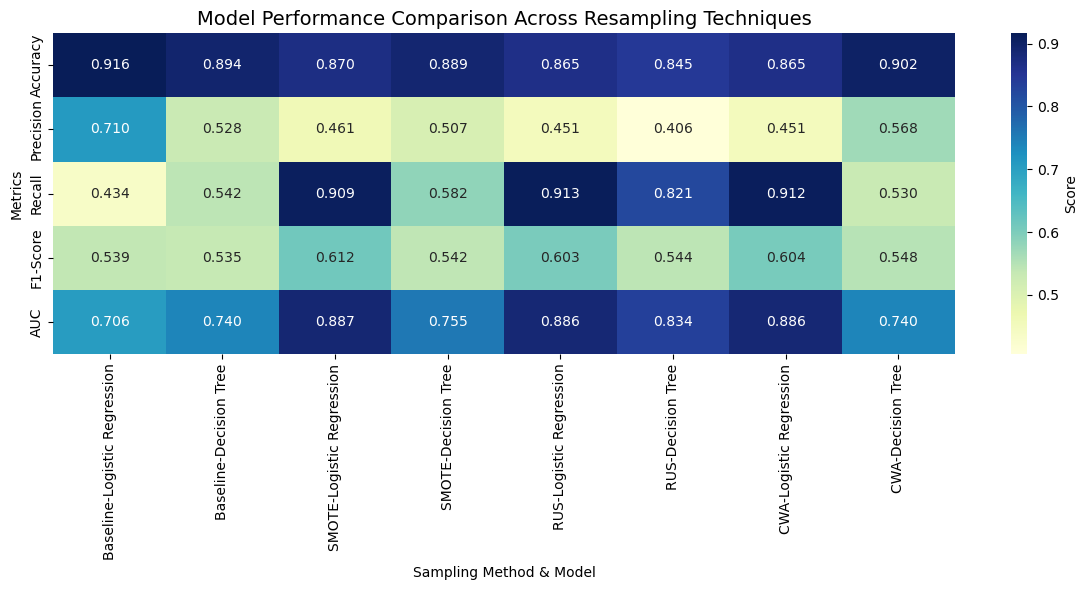

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all results
results_dict = {
    ("Baseline", "Logistic Regression"): [0.916242, 0.709507, 0.434267, 0.538770, 0.705848],
    ("Baseline", "Decision Tree"):       [0.893785, 0.527807, 0.542026, 0.534822, 0.740233],
    ("SMOTE", "Logistic Regression"):    [0.870235, 0.461454, 0.909483, 0.612260, 0.887368],
    ("SMOTE", "Decision Tree"):          [0.889051, 0.506567, 0.581897, 0.541625, 0.754970],
    ("RUS", "Logistic Regression"):      [0.864773, 0.450532, 0.912716, 0.603276, 0.885701],
    ("RUS", "Decision Tree"):            [0.844622, 0.406183, 0.821121, 0.543509, 0.834363],
    ("CWA", "Logistic Regression"):      [0.865259, 0.451441, 0.911638, 0.603854, 0.885504],
    ("CWA", "Decision Tree"):            [0.901675, 0.568129, 0.530172, 0.548495, 0.739505]
}

# Convert to MultiIndex DataFrame
index = pd.MultiIndex.from_tuples(results_dict.keys(), names=["Sampling", "Model"])
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
df_results = pd.DataFrame(results_dict.values(), index=index, columns=metrics)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_results.T, annot=True, cmap="YlGnBu", fmt=".3f", cbar_kws={'label': 'Score'})
plt.title("Model Performance Comparison Across Resampling Techniques", fontsize=14)
plt.ylabel("Metrics")
plt.xlabel("Sampling Method & Model")
plt.tight_layout()
plt.show()


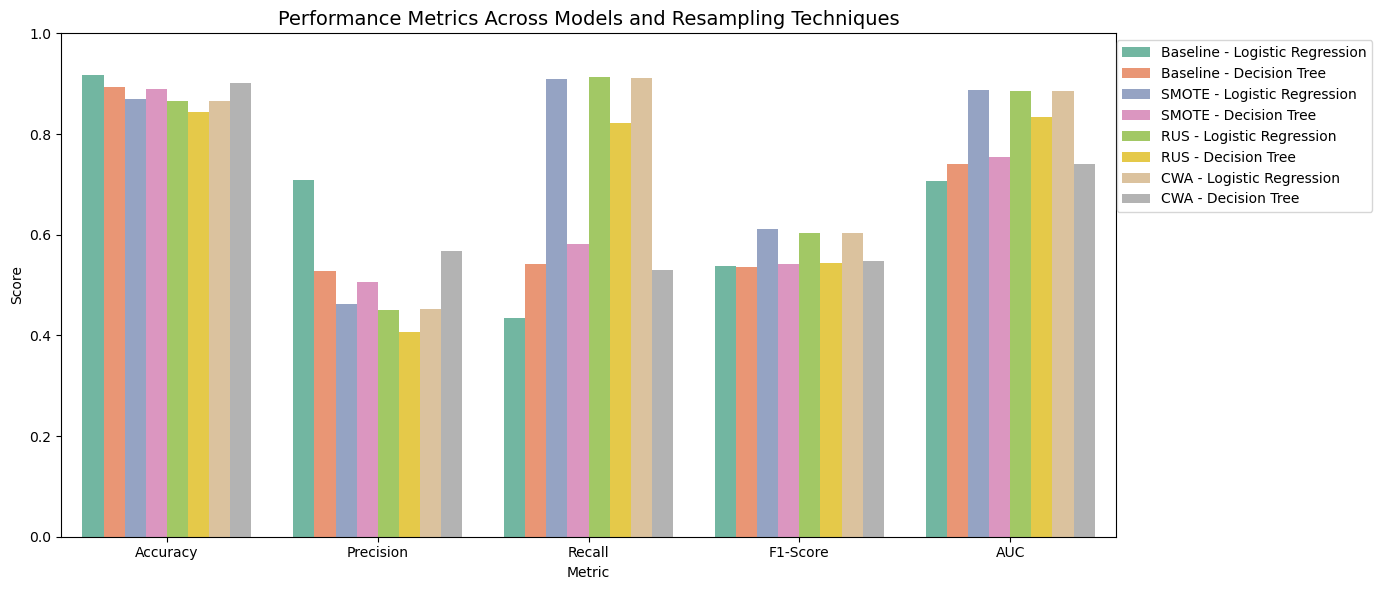

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the performance data
results_dict = {
    ("Baseline", "Logistic Regression"): [0.916242, 0.709507, 0.434267, 0.538770, 0.705848],
    ("Baseline", "Decision Tree"):       [0.893785, 0.527807, 0.542026, 0.534822, 0.740233],
    ("SMOTE", "Logistic Regression"):    [0.870235, 0.461454, 0.909483, 0.612260, 0.887368],
    ("SMOTE", "Decision Tree"):          [0.889051, 0.506567, 0.581897, 0.541625, 0.754970],
    ("RUS", "Logistic Regression"):      [0.864773, 0.450532, 0.912716, 0.603276, 0.885701],
    ("RUS", "Decision Tree"):            [0.844622, 0.406183, 0.821121, 0.543509, 0.834363],
    ("CWA", "Logistic Regression"):      [0.865259, 0.451441, 0.911638, 0.603854, 0.885504],
    ("CWA", "Decision Tree"):            [0.901675, 0.568129, 0.530172, 0.548495, 0.739505]
}

# Convert to long-form DataFrame for seaborn
index = pd.MultiIndex.from_tuples(results_dict.keys(), names=["Sampling", "Model"])
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
df = pd.DataFrame(results_dict.values(), index=index, columns=metrics).reset_index()
df_long = df.melt(id_vars=["Sampling", "Model"], var_name="Metric", value_name="Score")
df_long["Model_Type"] = df_long["Sampling"] + " - " + df_long["Model"]

# Set up the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df_long, x="Metric", y="Score", hue="Model_Type", palette="Set2")

# Final touches
plt.title("Performance Metrics Across Models and Resampling Techniques", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


# Implications

### 📝 **Introduction**

In direct marketing campaigns such as telebanking, contacting every customer can be costly and inefficient, especially when the conversion rate is low. Machine Learning (ML) offers a way to selectively contact customers who are most likely to respond positively. This simulation compares the financial implications of using an ML-based strategy versus a naive strategy (contacting all customers) by analyzing cost, profit, and net profit. We also explore how different precision and recall values—key performance metrics in ML classification—impact campaign profitability through F1-score trade-offs.

---

### 📊 **Simulation Setup**

| **Parameter**                    | **Value**             | **Description**                                            |
| -------------------------------- | --------------------- | ---------------------------------------------------------- |
| Total Customers                  | 100 and 100,000       | Two scenarios to represent small and large-scale campaigns |
| Naive Conversion Rate            | 5%                    | Assumed base success rate for contacting all customers     |
| ML Precision Range               | 0.1 to 0.9 (step 0.1) | Probability that predicted "yes" is truly "yes"            |
| ML Recall Range                  | 0.1 to 0.9 (step 0.1) | Proportion of actual "yes" that the model captures         |
| Contact Cost per Customer        | RM1                    | Cost incurred for each contact attempt                     |
| Profit per Successful Conversion | RM25                   | Estimated bank profit from a successful term deposit       |
| Evaluation Metric                | F1-Score, Net Profit  | Trade-off analysis between model quality and business gain |



In [44]:
advertisement_cost = 1
conversion_rate = 0.1
profit_per_conversion = 50

In [45]:
# Best Selected Model
lr = LogisticRegression(class_weight='balanced', random_state=42)
# lr = LogisticRegression(random_state=42)
lr.fit(X_train_processed, y_train)
# lr.fit(X_train_smote, y_train_smote)

y_pred = lr.predict(X_test_processed)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

TP = confusion_matrix(y_test, y_pred)[1, 1]
TN = confusion_matrix(y_test, y_pred)[0, 0]
FP = confusion_matrix(y_test, y_pred)[0, 1]
FN = confusion_matrix(y_test, y_pred)[1, 0]

# Print the results
print("Logistic Regression on SMOTE Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

print("===========================")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression on SMOTE Data:
Accuracy: 0.8655
Precision: 0.4519
Recall: 0.9116
F1 Score: 0.6043
AUC: 0.8856
Confusion Matrix:
[[6284 1026]
 [  82  846]]


| Metric                | Formula                                            | Description                                                          |
| --------------------- | -------------------------------------------------- | -------------------------------------------------------------------- |
| **Contacted**         | `TP + FP`                                          | Total customers the model predicts as positive and are contacted.    |
| **Model Gain (RM)**    | `TP × average_purchase`                            | Revenue from correctly predicted conversions.                        |
| **Model Lost (RM)**    | `FN × average_purchase`                            | Potential revenue lost from missed actual positives (not contacted). |
| **Model Cost (RM)**    | `(TP + FP) × advertisement_cost`                   | Total cost of contacting customers.                                  |
| **Model Revenue (RM)** | `Model Gain (RM) − Model Cost (RM)`                  | Revenue after deducting contact cost.                                |
| **Model Value (RM)**   | `Model Gain (RM) − Model Cost (RM) − Model Lost (RM)` | Net business value considering both cost and missed opportunities.   |


In [46]:
# Step 1: Confusion Matrix Estimation
def calculate_new_confusion_matrix(precision, recall, purchase_rate, total_samples):
    total_positives = purchase_rate * total_samples
    new_TP = recall * total_positives
    new_FN = total_positives - new_TP
    new_FP = (new_TP / precision) - new_TP if precision > 0 else 0
    new_TN = total_samples - (new_TP + new_FP + new_FN)
    return np.round([[new_TN, new_FP], [new_FN, new_TP]]).astype(int)

# Step 2: Business Impact Evaluation
def evaluate_model_business_impact(conf_matrix, total_samples, strategy, advertisement_cost, average_purchase):
    TN, FP = conf_matrix[0]
    FN, TP = conf_matrix[1]
    contacted = TP + FP
    model_cost = advertisement_cost * contacted
    model_gain = average_purchase * TP
    model_lost = average_purchase * FN
    model_revenue = model_gain - model_cost
    model_value = model_gain - model_lost - model_cost

    return {
        "Strategy": strategy,
        "Total Customers": total_samples,
        "Contacted": contacted,
        "Model Gain (RM)": model_gain,
        "Model Lost (RM)": model_lost,
        "Model Cost (RM)": model_cost,
        "Model Revenue (RM)": model_revenue,
        "Model Value (RM)": model_value
    }

# Step 3: Naive Strategy
def simulate_naive_strategy(total_customers, conversion_rate, advertisement_cost, average_purchase):
    contacted = total_customers
    conversions = total_customers * conversion_rate
    gain = conversions * average_purchase
    cost = contacted * advertisement_cost
    revenue = gain - cost
    value = gain - cost

    return {
        "Strategy": "Naive",
        "Total Customers": total_customers,
        "Contacted": contacted,
        "Model Gain (RM)": gain,
        "Model Lost (RM)": 0,
        "Model Cost (RM)": cost,
        "Model Revenue (RM)": revenue,
        "Model Value (RM)": value
    }

# Step 4: Parameters
total_customers = 100000
conversion_rate = 0.05
advertisement_cost = 1
average_purchase = 25

# Example precisions and recalls from 8 models
model_metrics = [
    ("Baseline - LR", all_results.iloc[2,3], all_results.iloc[4,3]),
    ("Baseline - DT", all_results.iloc[3,3], all_results.iloc[5,3]),
    ("SMOTE - LR", all_results.iloc[12,3], all_results.iloc[14,3]),
    ("SMOTE - DT", all_results.iloc[13,3], all_results.iloc[15,3]),
    ("RUS - LR", all_results.iloc[22,3], all_results.iloc[24,3]),
    ("RUS - DT", all_results.iloc[23,3], all_results.iloc[25,3]),
    ("CWA - LR", all_results.iloc[32,3], all_results.iloc[34,3]),
    ("CWA - DT", all_results.iloc[33,3], all_results.iloc[35,3])
]

# Collect results
results = []

# Add ML model results
for name, precision, recall in model_metrics:
    conf_matrix = calculate_new_confusion_matrix(precision, recall, conversion_rate, total_customers)
    model_result = evaluate_model_business_impact(conf_matrix, total_customers, name, advertisement_cost, average_purchase)
    results.append(model_result)

# Add Naive result
naive_result = simulate_naive_strategy(total_customers, conversion_rate, advertisement_cost, average_purchase)
results.append(naive_result)

# Step 5: Display in DataFrame
comparison_df = pd.DataFrame(results)
display(comparison_df)


IndexError: index 32 is out of bounds for axis 0 with size 30

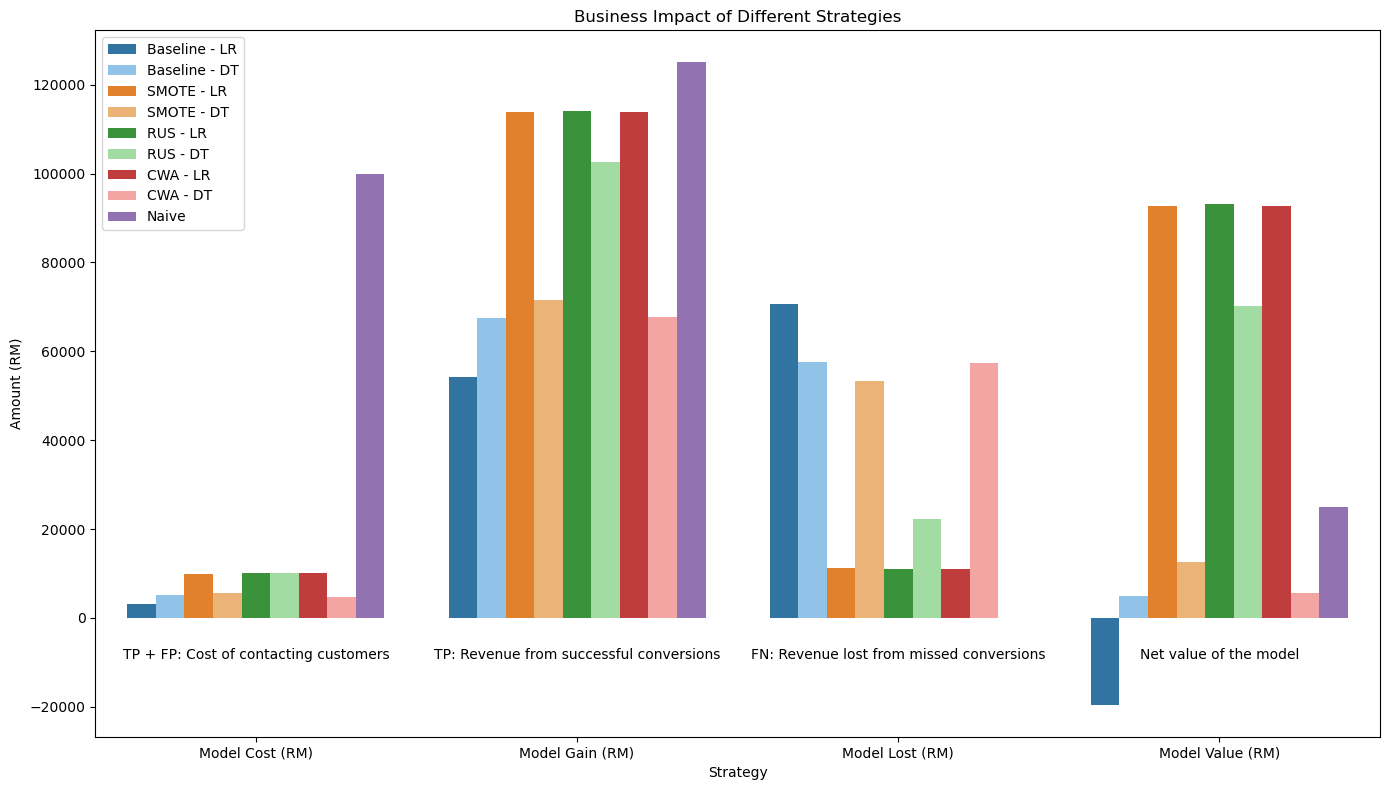

In [ ]:
unpivoted_comparison_df = comparison_df.melt(id_vars=['Strategy', 'Total Customers', 'Contacted'],
                                              value_vars=['Model Cost (RM)', 'Model Gain (RM)', 'Model Lost (RM)', 'Model Value (RM)'],
                                              var_name='Metric', value_name='Amount (RM)')

# Colour mapping for the bar plot
colour_mapping = {
    "Baseline - LR": '#1f77b4',  # Blue
    "Baseline - DT": "#82c5f5", # Light Blue
    "SMOTE - LR": '#ff7f0e',  # Orange
    "SMOTE - DT": "#ffb366",  # Light Orange
    "RUS - LR": '#2ca02c',  # Green
    "RUS - DT": "#99e699",  # Light Green
    "CWA - LR": "#d62728",  # Red
    "CWA - DT": "#ff9896",   # Light Red
    "Naive": "#9467bd"  # Purple
}
# Plot Strategy grouped by Model Cost, Model Gain, Model Lost and Model Value
plt.figure(figsize=(14, 8))
sns.barplot(data=unpivoted_comparison_df, x='Metric', y='Amount (RM)', hue='Strategy', palette=colour_mapping)
plt.title('Business Impact of Different Strategies')

# Text to indicate the relating confusion matrix metrics
plt.text(0, -10000, 'TP + FP: Cost of contacting customers',ha='center', va='bottom')
plt.text(1, -10000, 'TP: Revenue from successful conversions',ha='center', va='bottom')
plt.text(2, -10000, 'FN: Revenue lost from missed conversions',ha='center', va='bottom')
plt.text(3, -10000, 'Net value of the model',ha='center', va='bottom')

plt.ylabel('Amount (RM)')
plt.xlabel('Strategy')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## 🧠 **How Class Imbalance Affects This Chart**

### 1. 🎯 The Core Problem: Class Imbalance

In your **Bank Marketing** dataset, only **\~5% of customers say "yes"** (subscribe), while **\~95% say "no"**.
This imbalance affects model learning and output in several ways:

---

### 2. 📉 Impact on Baseline (Without Sampling)

* **Baseline - LR** has **low model value**, possibly **negative**, due to:

  * High **FN (missed "yes" predictions)** → high `Model Lost (RM)`
  * Overwhelming bias toward the majority "no" class
  * Low recall and thus low gains despite good precision

This shows that **untreated imbalance leads to underperforming models**, despite possibly decent accuracy.

---

### 3. 🧪 What Sampling Does (SMOTE, RUS, CWA)

#### ✅ SMOTE

* Increases the number of minority ("yes") examples via synthetic data
* **Result**: Improves recall → More TP → Higher gains
* In your plot: **SMOTE - LR/DT** have **much higher model values** due to better balance of gain vs. cost/loss

#### ✅ RUS (Random Undersampling)

* Reduces the number of "no" examples
* **Result**: Forces models to pay more attention to minority class
* Often a tradeoff: slightly higher loss (FN) but **lower cost (fewer customers contacted)**

#### ✅ Class Weight Adjustment (CWA)

* Gives more penalty to misclassifying minority class during training
* Keeps full dataset, but **focuses model on "yes"**
* **Balanced performance** with **moderate cost** and **good gain**, seen in your chart

---

### 4. 📊 Visual Correlation

| Strategy    | Model Cost | Model Lost | Model Value | Class Imbalance Insight          |
| ----------- | ---------- | ---------- | ----------- | -------------------------------- |
| Baseline LR | Low        | High       | ❌ Negative  | Can't find "yes" well            |
| SMOTE       | High       | Lower      | ✅ High      | Better minority recall           |
| RUS         | Low        | Medium     | ✅ Good      | Trades off cost & loss           |
| CWA         | Medium     | Low        | ✅ Very High | Most balanced result             |
| Naive       | Highest    | 0          | ✅ Safe      | Contacts everyone, but expensive |

---

## 📣 Key Takeaway:

> “This chart shows how **class imbalance suppresses model effectiveness**, especially in cost-sensitive decisions.
> Techniques like SMOTE and class weighting allow models to **recover minority signals**, leading to higher true positives (conversions) and much better **business value**.”


## 📊 **Impact of Sampling on TP, FP, TN, FN**

| Metric | What it is                       | Why it's important in imbalanced classification |
| ------ | -------------------------------- | ----------------------------------------------- |
| **TP** | Correctly predicted “yes”        | Drives revenue (Model Gain RM)                   |
| **FP** | Incorrectly predicted “yes”      | Drives cost (Model Cost RM)                      |
| **TN** | Correctly predicted “no”         | No financial effect (not contacted)             |
| **FN** | Missed “yes” (predicted as “no”) | Missed revenue (Model Lost RM)                   |

---

## 🔍 Strategy-by-Strategy Insight

### 🟥 **Baseline (LR, DT)**

* **TP** = Low → Low revenue
* **FP** = Moderate → Some cost
* **FN** = High → High loss
* **Insight**: Model doesn’t learn “yes” well due to imbalance → poor recall → bad business outcome

---

### 🟩 **SMOTE**

* **TP** = Much higher → High revenue
* **FP** = Also higher → Higher cost
* **FN** = Lower → Less missed opportunity
* **Insight**: SMOTE helps model learn minority class → better recall → higher true conversions, but you pay to reach more people
  ✔ Best used when gain per TP > cost per FP

---

### 🟧 **RUS (Random Undersampling)**

* **TP** = Moderate
* **FP** = Lower → Lower cost
* **FN** = Slightly higher than SMOTE
* **Insight**: Conservative contact strategy → may miss some TPs, but cost-effective
  ✔ Good for limited marketing budget

---

### 🟪 **Class Weight Adjustment**

* **TP** = High
* **FP** = Moderate
* **FN** = Lower
* **Insight**: Balanced recall and precision → good conversion with manageable cost
  ✅ Often optimal tradeoff between profit and cost

---

### ⚪ **Naive**

* **TP** = All actual "yes"
* **FP** = All actual "no"
* **FN** = 0
* **Insight**: No missed opportunity, but **massive cost**
  ❌ Unsustainable at scale

---

## 🧠 Business Interpretation

| Strategy     | TP ↑      | FP ↑      | FN ↓      | Effect                                        |
| ------------ | --------- | --------- | --------- | --------------------------------------------- |
| **Baseline** | ✖️ Low    | ⚠️ Medium | ✅ High    | Poor model recall → low profit, high loss     |
| **SMOTE**    | ✅ High    | ⚠️ High   | ✅ Low     | High reach + conversions, but costly          |
| **RUS**      | ⚠️ Medium | ✅ Low     | ⚠️ Medium | Lower cost, lower risk, some lost conversions |
| **CWA**      | ✅ High    | ⚠️ Medium | ✅ Low     | Balanced gain-cost profile                    |
| **Naive**    | ✅ Max     | ❌ Max     | ✅ None    | Perfect recall, but cost-prohibitive          |


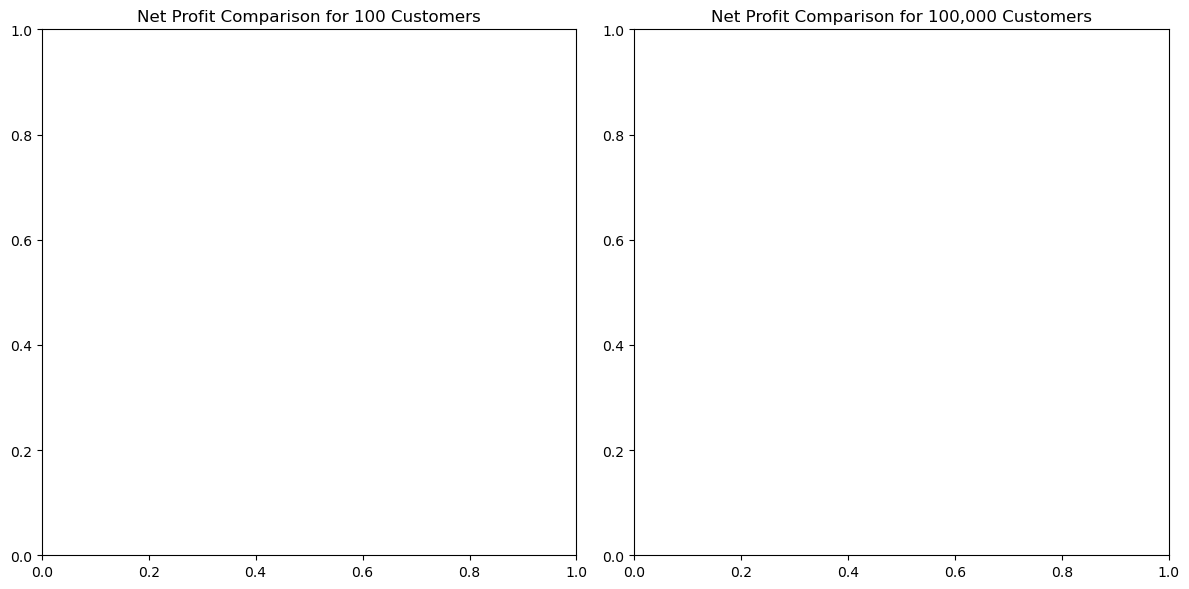

In [ ]:
# Plot the difference in net profit between Naive and ML strategies
fig, ax = plt.subplots(figsize=(12, 6), ncols=2, nrows=1)

# Plot for 100 customers
sns.barplot(x='Strategy', y='Model Value (RM)', data=comparison_df[comparison_df['Total Customers'] == 100], ax=ax[0])
ax[0].set_title('Net Profit Comparison for 100 Customers')
# Plot for 100,000 customers
sns.barplot(x='Strategy', y='Model Value (RM)', data=comparison_df[comparison_df['Total Customers'] == 1000000], ax=ax[1])
ax[1].set_title('Net Profit Comparison for 100,000 Customers')

plt.tight_layout()
plt.show()


# Deep Learning

In [ ]:
import tensorflow as tf
print(tf.__version__)  # Should be 2.18.1

Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
BinaryCrossentropy = tf.keras.losses.BinaryCrossentropy
AUC = tf.keras.metrics.AUC
Precision = tf.keras.metrics.Precision
Recall = tf.keras.metrics.Recall
EarlyStopping = tf.keras.callbacks.EarlyStopping



2.18.1


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get unique class labels from y_train
classes = np.unique(y_train)

# Compute weights inversely proportional to class frequencies
weights = compute_class_weight(class_weight='balanced',
                               classes=classes,
                               y=y_train)

# Convert to dictionary format
class_weight = dict(zip(classes, weights))
print("Class weights:", class_weight)


Class weights: {0: 0.5634790341336616, 1: 4.438308189655173}


🧠 Purpose of `compute_class_weight`

It helps **automatically adjust for class imbalance** by assigning **higher weights to the minority class** and **lower weights to the majority class** when training models.

This helps the model **not be biased toward the majority class**.

---

⚙️ How It Works (Mechanism)

```python
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
```

When you set `class_weight='balanced'`, it calculates class weights as:

$$
\text{Weight}_c = \frac{n_{\text{samples}}}{n_{\text{classes}} \times n_c}
$$

Where:

* $n_{\text{samples}}$: Total number of samples
* $n_{\text{classes}}$: Total number of unique classes (usually 2 in binary)
* $n_c$: Number of samples in class `c`

---

✅ Example:

Suppose your labels are:

```
y_train = [0, 0, 0, 0, 1, 1]
```

* Total samples = 6
* Classes = \[0, 1]
* Samples of class 0 = 4
* Samples of class 1 = 2

Then the weights would be:

$$
\text{Weight}_0 = \frac{6}{2 \times 4} = 0.75 \\
\text{Weight}_1 = \frac{6}{2 \times 2} = 1.5
$$

So the `class_weight` would be:

```python
{0: 0.75, 1: 1.5}
```

Now when the model trains, **errors made on class 1 (minority)** will be **penalized more heavily**, pushing the model to treat both classes more equally.

---

🛠️ Summary

* `compute_class_weight` balances the contribution of each class during training.
* It’s ideal for **imbalanced datasets**.
* Use it to avoid your model **defaulting to predicting the majority class**.



In [ ]:
X_train_processed = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())
X_test_processed = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
# Define the neural network
model = Sequential([
    Dense(14, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),  # Increased dropout for regularization
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam',
              loss=BinaryCrossentropy(),  # Call the focal_loss function to get the actual loss function
              metrics=[Precision(), Recall(), AUC()])

# Add EarlyStopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=100,
                    batch_size=32,
                    class_weight=class_weight,  # Give higher weight to the positive class
                    callbacks=[early_stop])

Epoch 1/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - auc_4: 0.7922 - loss: 0.5460 - precision_4: 0.2400 - recall_4: 0.7462 - val_auc_4: 0.9386 - val_loss: 0.3456 - val_precision_4: 0.3583 - val_recall_4: 0.9644
Epoch 2/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc_4: 0.9117 - loss: 0.3775 - precision_4: 0.3540 - recall_4: 0.9116 - val_auc_4: 0.9416 - val_loss: 0.2935 - val_precision_4: 0.3875 - val_recall_4: 0.9526
Epoch 3/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc_4: 0.9216 - loss: 0.3389 - precision_4: 0.3641 - recall_4: 0.9317 - val_auc_4: 0.9433 - val_loss: 0.2844 - val_precision_4: 0.4076 - val_recall_4: 0.9461
Epoch 4/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc_4: 0.9275 - loss: 0.3232 - precision_4: 0.3775 - recall_4: 0.9333 - val_auc_4: 0.9432 - val_loss: 0.3280 - val_precision_4: 0.3793 - val_recall_4: 0.9688
Epoch 5/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc_4: 0.9257 - loss: 0.3275 - precision_4: 0.3754 - recall_4: 0.9364 - val_auc_4: 

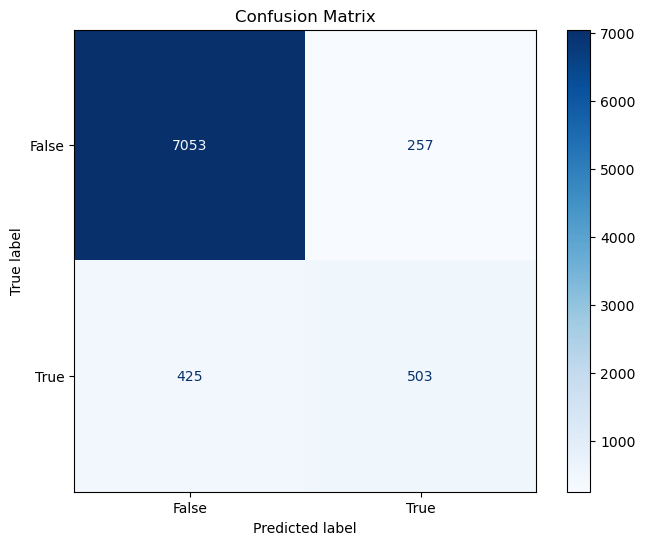

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["False", "True"])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed
disp.plot(ax=ax, cmap='Blues', colorbar=True)

plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")


# get model metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate new confusion matrix based on the model's predictions
new_conf_matrix = calculate_new_confusion_matrix(precision, recall, conversion_rate, total_customers)

# Evaluate the model's business impact
model_business_impact = evaluate_model_business_impact(new_conf_matrix, total_customers, "Neural Network", advertisement_cost, average_purchase)

# Display the model's business impact
model_business_impact_df = pd.DataFrame([model_business_impact])


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


In [ ]:
# Combine with previous results
comparison_df = pd.concat([comparison_df, model_business_impact_df], ignore_index=True)

comparison_df

,Strategy,Total Customers,Contacted,Model Gain (RM),Model Lost (RM),Model Cost (RM),Model Revenue (RM),Model Value (RM)
0,Baseline - LR,100000,3060,54275.0,70725,3060,51215.0,-19510.0
1,Baseline - DT,100000,5080,67475.0,57525,5080,62395.0,4870.0
2,SMOTE - LR,100000,9849,113825.0,11175,9849,103976.0,92801.0
3,SMOTE - DT,100000,5695,71650.0,53350,5695,65955.0,12605.0
4,RUS - LR,100000,10130,114100.0,10900,10130,103970.0,93070.0
5,RUS - DT,100000,10194,102650.0,22350,10194,92456.0,70106.0
6,CWA - LR,100000,10097,113950.0,11050,10097,103853.0,92803.0
7,CWA - DT,100000,4742,67625.0,57375,4742,62883.0,5508.0
8,Naive,100000,100000,125000.0,0,100000,25000.0,25000.0
9,Neural Network,100000,11606,118275.0,6725,11606,106669.0,99944.0


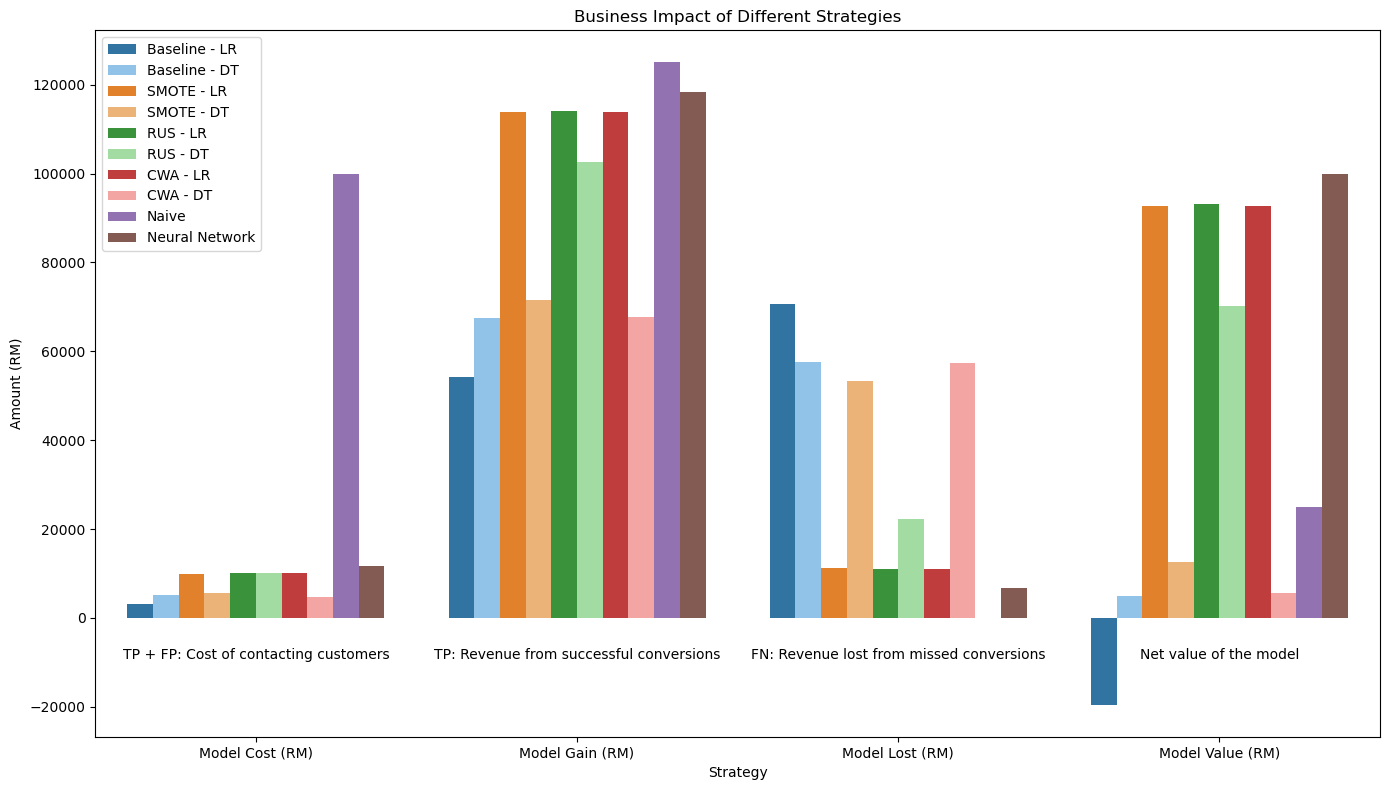

In [ ]:
unpivoted_comparison_df = comparison_df.melt(id_vars=['Strategy', 'Total Customers', 'Contacted'],
                                              value_vars=['Model Cost (RM)', 'Model Gain (RM)', 'Model Lost (RM)', 'Model Value (RM)'],
                                              var_name='Metric', value_name='Amount (RM)')

# Colour mapping for the bar plot
colour_mapping = {
    "Baseline - LR": '#1f77b4',  # Blue
    "Baseline - DT": "#82c5f5", # Light Blue
    "SMOTE - LR": '#ff7f0e',  # Orange
    "SMOTE - DT": "#ffb366",  # Light Orange
    "RUS - LR": '#2ca02c',  # Green
    "RUS - DT": "#99e699",  # Light Green
    "CWA - LR": "#d62728",  # Red
    "CWA - DT": "#ff9896",   # Light Red
    "Naive": "#9467bd",  # Purple
    "Neural Network": "#8c564b"  # Brown
}
# Plot Strategy grouped by Model Cost, Model Gain, Model Lost and Model Value
plt.figure(figsize=(14, 8))
sns.barplot(data=unpivoted_comparison_df, x='Metric', y='Amount (RM)', hue='Strategy', palette=colour_mapping)
plt.title('Business Impact of Different Strategies')

# Text to indicate the relating confusion matrix metrics
plt.text(0, -10000, 'TP + FP: Cost of contacting customers',ha='center', va='bottom')
plt.text(1, -10000, 'TP: Revenue from successful conversions',ha='center', va='bottom')
plt.text(2, -10000, 'FN: Revenue lost from missed conversions',ha='center', va='bottom')
plt.text(3, -10000, 'Net value of the model',ha='center', va='bottom')

plt.ylabel('Amount (RM)')
plt.xlabel('Strategy')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
